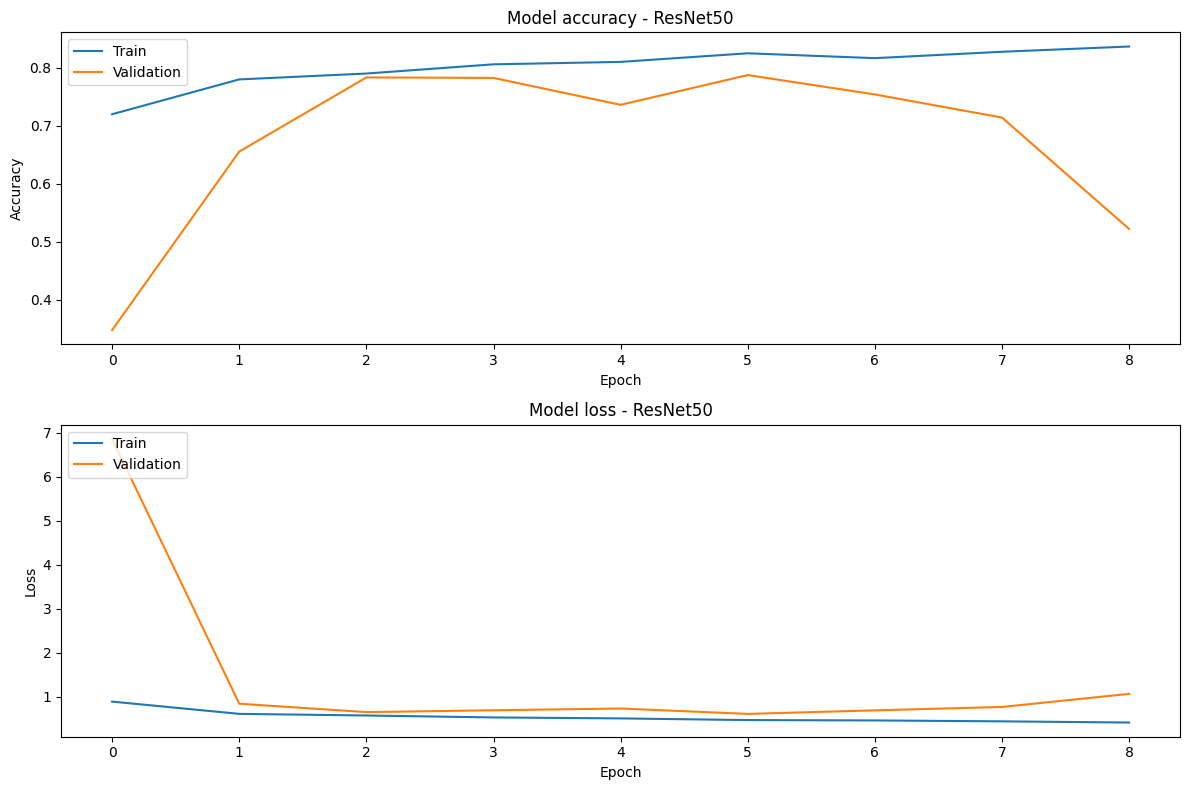

In [3]:
import os
import json
import matplotlib.pyplot as plt

# Define the directory where the history is saved
save_dir = './split_datav4'

# Load the training history
history_path = os.path.join(save_dir, 'resnet50_history.json')
with open(history_path, 'r') as f:
    history = json.load(f)

# Plot learning curves
def plot_learning_curve(history, model_name):
    plt.figure(figsize=(12, 8))

    # Plot training & validation accuracy values
    plt.subplot(2, 1, 1)
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    plt.title(f'Model accuracy - {model_name}')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(2, 1, 2)
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    plt.title(f'Model loss - {model_name}')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Plot learning curve for ResNet50
plot_learning_curve(history, 'ResNet50')


39/39 ━━━━━━━━━━━━━━━━━━━━ 39s 921ms/step


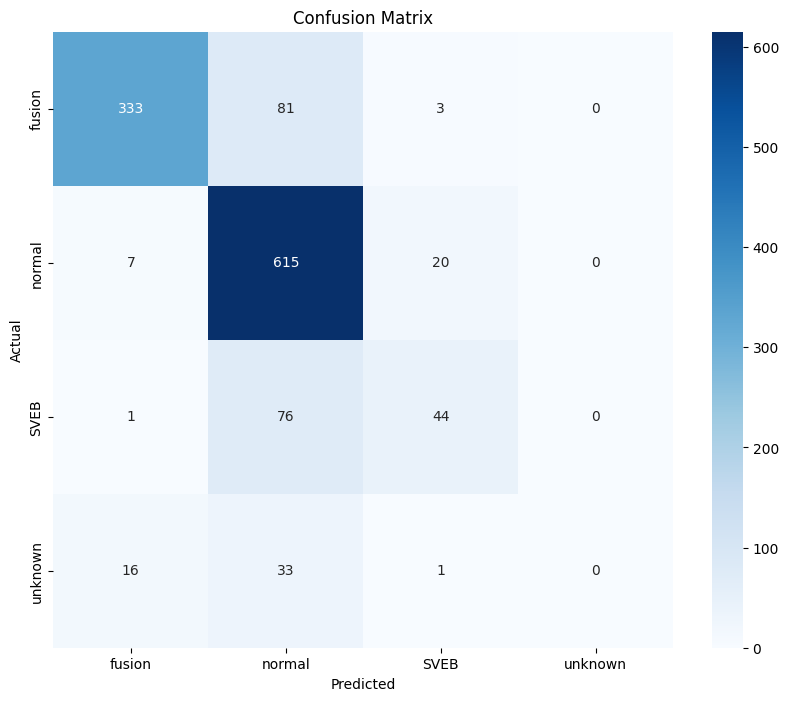

Classification Report:
               precision    recall  f1-score   support

      fusion       0.93      0.80      0.86       417
      normal       0.76      0.96      0.85       642
        SVEB       0.65      0.36      0.47       121
     unknown       0.00      0.00      0.00        50

    accuracy                           0.81      1230
   macro avg       0.59      0.53      0.54      1230
weighted avg       0.78      0.81      0.78      1230



/home/researchgroup/miniconda3/envs/newtestv2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/researchgroup/miniconda3/envs/newtestv2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/researchgroup/miniconda3/envs/newtestv2/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

In [5]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Define directories
save_dir = './split_datav4'

# Load the split data
X_rp_test = np.load(os.path.join(save_dir, 'X_rp_test.npy'))
X_gaf_test = np.load(os.path.join(save_dir, 'X_gaf_test.npy'))
X_mtf_test = np.load(os.path.join(save_dir, 'X_mtf_test.npy'))
y_test = np.load(os.path.join(save_dir, 'y_test.npy'))

# Resize images to (224, 224, 3) and keep only RGB channels
def resize_images(images):
    resized_images = []
    for img in images:
        img = tf.image.resize(img, [224, 224])
        img = img[:, :, :3]  # Keep only RGB channels
        resized_images.append(img)
    return np.array(resized_images)

X_rp_test = resize_images(X_rp_test)
X_gaf_test = resize_images(X_gaf_test)
X_mtf_test = resize_images(X_mtf_test)

# Load the saved model
model = load_model(os.path.join(save_dir, 'resnet50_model.keras'))

# Make predictions
y_pred = model.predict([X_rp_test, X_gaf_test, X_mtf_test])
y_pred_classes = np.argmax(y_pred, axis=1)

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix with original class names (excluding VEB)
class_names = ['fusion', 'normal', 'SVEB', 'unknown']
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report with original class names (excluding VEB)
class_report = classification_report(y_test, y_pred_classes, target_names=class_names)
print("Classification Report:\n", class_report)
